# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I swore I would never fly B...
1,✅ Trip Verified | Obviously many airlines hav...
2,✅ Trip Verified | Lost 3 out of 4 checked bags...
3,✅ Trip Verified | I have flown with BA for ma...
4,✅ Trip Verified | Boarding at Mumbai was chaot...


In [4]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [5]:
df.head()

,reviews
0,I swore I would never fly BA again after the...
1,Obviously many airlines have gone downhill i...
2,Lost 3 out of 4 checked bags. Denied wheelcha...
3,I have flown with BA for many years and ther...
4,Boarding at Mumbai was chaotic and badly orga...


In [6]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...
1,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...
2,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...
3,I have flown with BA for many years and ther...,I have flown with BA for many years and there...
4,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...


In [7]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Sebastian
[nltk_data]     Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Sebastian
[nltk_data]     Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Sebastian
[nltk_data]     Thomas\AppData\Roaming\nltk_data...


In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Sebastian
[nltk_data]     Thomas\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sebastian Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ..."
1,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go..."
2,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ..."
3,I have flown with BA for many years and ther...,I have flown with BA for many years and there...,"[(flown, v), (BA, n), (many, a), (years, n), (..."
4,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba..."


In [9]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ...",swear would never fly BA mess much try get B...
1,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go...",Obviously many airline go downhill recent ye...
2,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ...",Lost checked bag Denied wheelchair assistanc...
3,I have flown with BA for many years and ther...,I have flown with BA for many years and there...,"[(flown, v), (BA, n), (many, a), (years, n), (...",fly BA many year time year ago get well Sadl...
4,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...


In [10]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I swore I would never fly BA again after the...,swear would never fly BA mess much try get B...
1,Obviously many airlines have gone downhill i...,Obviously many airline go downhill recent ye...
2,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost checked bag Denied wheelchair assistanc...
3,I have flown with BA for many years and ther...,fly BA many year time year ago get well Sadl...
4,Boarding at Mumbai was chaotic and badly orga...,Boarding Mumbai chaotic badly organise board...
...,...,...
995,I took the new option of the new Toronto to L...,take new option new Toronto London Gatwick d...
996,First time flying with British Airways in ec...,First time fly British Airways economy Trans...
997,Geneva to Vancouver via London. Worst experi...,Geneva Vancouver via London Worst experience...
998,This is the first time I have flown BA's Clu...,first time fly BA Club Europe fly London Hea...


In [11]:
!pip install vaderSentiment

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ...",swear would never fly BA mess much try get B...,0.8888,Positive
1,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go...",Obviously many airline go downhill recent ye...,-0.9588,Negative
2,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ...",Lost checked bag Denied wheelchair assistanc...,-0.9702,Negative
3,I have flown with BA for many years and ther...,I have flown with BA for many years and there...,"[(flown, v), (BA, n), (many, a), (years, n), (...",fly BA many year time year ago get well Sadl...,-0.5719,Negative
4,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...,0.9871,Positive


In [13]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    527
Negative    368
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1d3bb48bb50>,
 [Text(-0.0931934888363163, 1.0960451512773166, 'Positive'),
  Text(-0.26685908433564776, -1.0671392735287835, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(-0.05083281209253616, 0.5978428097876272, '52.7%'),
  Text(-0.14555950054671696, -0.5820759673793363, '36.8%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

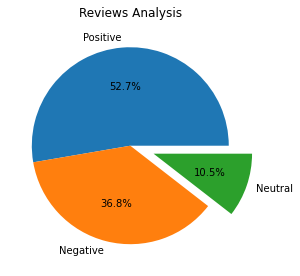

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [15]:
df.to_csv("BA_reviews.csv")

In [17]:
!pip install wordcloud

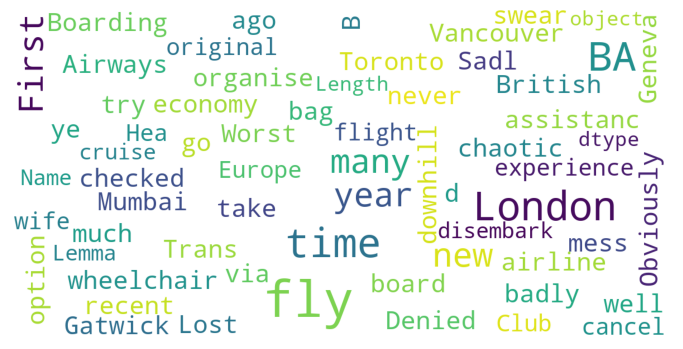

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)